### GAN project


In [4]:
# Digit recognition using a simple neural network

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

### Get data and preprocess

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

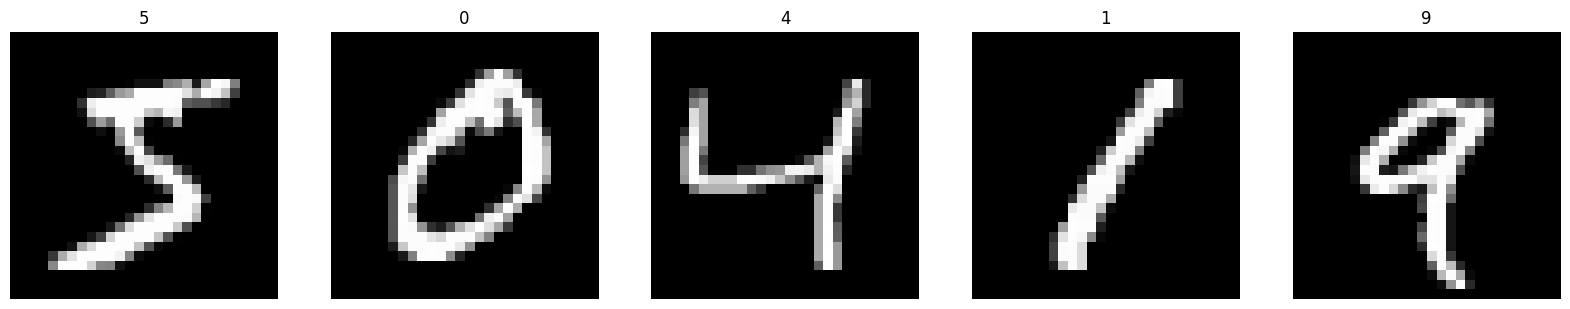

In [6]:
def plot_input_img(X, y):
    # Create a figure with 5 subplots side by side
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    
    # Loop over the first 5 images
    for i in range(5):
        # Display the image in grayscale
        axes[i].imshow(X[i], cmap='gray')
        # Set the title of the subplot with the corresponding label
        axes[i].set_title(y[i])
        # Turn off the axes for better visualization
        axes[i].axis('off')
    
    # Display the figure
    plt.show()

# Call the function to display the first 5 images of the training set
plot_input_img(X_train, y_train)



## Preprocess the images


In [7]:
# Normalize the training data by converting it to float32 and scaling the pixel values to the range [0, 1]
X_train = X_train.astype(np.float32) / 255

# Normalize the test data by converting it to float32 and scaling the pixel values to the range [0, 1]
X_test = X_test.astype(np.float32) / 255

#  reshape / expand the dimensions of images to 28x28x1
# Reshape the training data to add an extra dimension for the channel (28x28x1)
X_train = np.expand_dims(X_train, -1)

# Reshape the test data to add an extra dimension for the channel (28x28x1)
X_test = np.expand_dims(X_test, -1)

# Why Add a New Dimension?:

# Many deep learning frameworks (like TensorFlow or PyTorch) expect image data to have a channel dimension, even if it's just one channel for grayscale images.
# For example, Convolutional Neural Networks (CNNs) typically expect input data in the format (height, width, channels). Adding this extra dimension ensures compatibility with these models.

# Convert the training labels to one-hot encoded vectors
# This means that each label will be represented as a vector with a length equal to the number of classes (10 in this case)
# For example, if the label is 3, the one-hot encoded vector will be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# This is done to make it easier to train the neural network

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

# Convert the test labels to one-hot encoded vectors
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation, and input shape of 28x28x1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the previous layer to create a 1D feature vector
model.add(Flatten())

# Add a dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add a dense (fully connected) layer with 10 units and ReLU activation
model.add(Dense(10, activation='relu'))

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
"""
Compiles the model with the specified optimizer, loss function, and evaluation metrics.

This function configures the model for training by specifying the optimizer to use, 
the loss function to minimize, and the metrics to evaluate during training and testing.

Parameters:
    optimizer (str): The optimizer to use for training. In this case, 'adam' is used.
    loss (function): The loss function to minimize. Here, keras.losses.categorical_crossentropy is used.
    metrics (list): A list of metrics to evaluate during training and testing. Here, ['accuracy'] is used.

Returns:
    None
"""

"\nCompiles the model with the specified optimizer, loss function, and evaluation metrics.\n\nThis function configures the model for training by specifying the optimizer to use, \nthe loss function to minimize, and the metrics to evaluate during training and testing.\n\nParameters:\n    optimizer (str): The optimizer to use for training. In this case, 'adam' is used.\n    loss (function): The loss function to minimize. Here, keras.losses.categorical_crossentropy is used.\n    metrics (list): A list of metrics to evaluate during training and testing. Here, ['accuracy'] is used.\n\nReturns:\n    None\n"

In [14]:
# Callbacks

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#  EarlyStopping callback to stop training if the validation loss does not improve for 3 consecutive epochs
# ModelCheckpoint callback to save the model with the best validation loss
# ModelCheckpoint callback to save the model with the best validation loss in Keras format

# EarlyStopping callback to stop training if the validation accuracy does not improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


# ModelCheckpoint callback to save only the best weights with the best validation accuracy
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, save_weights_only=False)




## Model training

In [15]:
his = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# save the model

model.save('digit_recognition_model.keras')


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0991 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0967 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0991 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1003 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 9

In [16]:
model_saved = keras.models.load_model(r'C:\Users\pieta\OneDrive\Bureau\GAN\Notebooks\digit_recognition_model.keras')

In [17]:
score = model_saved.evaluate(X_test, y_test, verbose=0)
print(f"the model accuracy is {score[1]}")

the model accuracy is 0.09799999743700027
